## 로지스틱 회귀
- 가장 기본적인 분류 알고리즘
- [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

## Logistic Regression 모델구현

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True) # 지수 형태로 출력되지 않도록 하는 옵션

### 위스콘신 유방암 데이터셋 로드 및 표준화

* 위스콘신 유방암 데이터 셋
  - 유방암의 악성/양성 여부를 결정하는 이진분류 데이터 셋
  - 30개의 Feature로 유방암의 악성/양성 여부를 결정하는 이진분류 데이터 셋
* 전처리(정규화) 필요
  * Logistic Regression은 Linear Regression계열이기 때문에 데이터의 분포에 의해 성능 영항을 받음
* 데이터 구조
  - 데이터 : 위스콘신 유방암 진단 데이터
  - 관측치(row) 개수 : 569개
  - 변수(column) 개수 : 32개 (ID, 진단결과, 30개 실측 값)

* 각 세포에 대한 정보들
  - radius : 반경 (중심에서 외벽까지 거리들의 평균값)
  - texture : 질감 (Gray-Scale 값들의 표준편차)
  - perimeter : 둘레
  - area : 면적
  - smoothness : 매끄러움 (반경길이의 국소적 변화)
  - compactness : 조그만 정도 (둘레^2/면적-1)
  - concavity : 오목함(윤관의 오목한 부분의 정도)
  - concave points : 오목한 점의 수
  - symmetry : 대칭
  - fractal dimension : 프랙탈 차원 (해안선근사-1)

- mean : 평균값
- error : 표준오차
- worst : 큰 값3개의 평균

*  반응변수
  - 양성여부 (malignant : 악성-0, Benign : 양성-1)  

In [2]:
# 데이터 로드
cancer = load_breast_cancer()
cancer

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
           0.1189 ],
        [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
           0.08902],
        [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
           0.08758],
        ...,
        [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
           0.0782 ],
        [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
           0.124  ],
        [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
           0.07039]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# cancer.data를 데이터프레임에 저장(컬럼명: cancer.feature_names)
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [5]:
# df_cancer 상위 3개 데이터 조회
df_cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
# cancer.target을 df_cancer의 diagnosis 컬럼에 저장
df_cancer['diagnosis'] = cancer.target

In [7]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# df_cancer 데이터 크기 확인
df_cancer.shape

(569, 31)

In [9]:
# df_cancer 정보 확인
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# diagnosis 컬럼의 데이터 별 개수 확인
df_cancer['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

### 그래프로 시각화 하기

In [11]:
# df_cancer 컬럼명 조회
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 마지막 컬럼 diagnosis를 제외한 모든 컬럼의 컬럼명을 cols에 저장
cols = df_cancer.columns[:-1]
cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

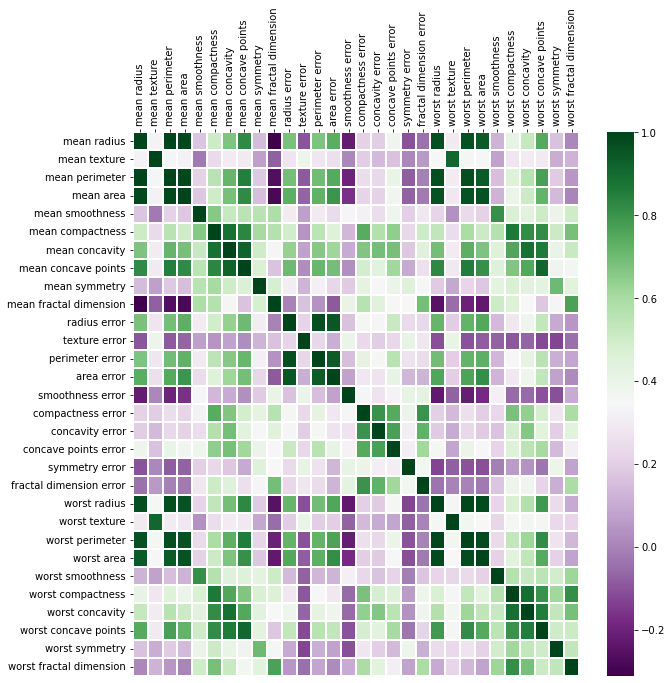

In [14]:
# 히트맵으로 feature들의 상관관계 확인

plt.figure(figsize=(10, 10))

# 히트맵은 상관관계를 나타내는 그래프이므로 반드시 파라미터에 corr() 함수 포함
heat_map = sns.heatmap(df_cancer[cols].corr(),
                       cmap='PRGn', 
                       linewidths=0.1)

heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=90)
heat_map.xaxis.set_ticks_position('top') # x축 ticks의 위치를 그래프 위쪽으로 이동

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# 모델 객체 생성(StandardScaler: 평균 0, 분산 1로 데이터 분포 변환)
scaler = StandardScaler()

# cancer.data(feature)를 표준화하여 data_scaled에 저장
data_scaled = scaler.fit_transform(cancer.data)

# 표준화된 값을 살펴보기 편하도록 데이터프레임에 저장(컬럼명: cancer.feature_names)
df_scaled = pd.DataFrame(data_scaled, columns=cancer.feature_names)
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [16]:
# df_scaled 통계값 확인
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [17]:
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터 분할(test_size: 30%)
x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size=0.3, random_state=0)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### 모델 생성 및 학습

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression 객체 생성(clf: classifier)
lr_clf = LogisticRegression(random_state=11)

# 모델 학습
lr_clf.fit(x_train, y_train)

# 학습/테스트 데이터 예측 수행(보통 테스트 데이터만 예측 수행)
lr_train_preds = lr_clf.predict(x_train) # 학습 데이터
lr_preds = lr_clf.predict(x_test) # 테스트 데이터

In [20]:
# 예측값(y_pred)과 정답 데이터를 이용하여 예측 정확도 측정

print(f'학습 데이터 정확도: {round((lr_train_preds == y_train).mean(), 3)}') # 예측값과 정답이 같은 데이터들의 평균
print(f'테스트 데이터 정확도: {round((lr_preds == y_test).mean(), 3)}')
print(f'테스트 Accuracy: {accuracy_score(y_test, lr_preds):.3f}') # accuracy_score 사용

학습 데이터 정확도: 0.99
테스트 데이터 정확도: 0.977
테스트 Accuracy: 0.977


## 분류 모델의 성능 측정

In [21]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

In [22]:
# 예측값(lr_preds)과 실제값(y_test)의 confusion_matrix 출력
confusion_matrix(y_test, lr_preds)

# 예측 성공(예측값 == 실제값): 60 + 107 = 167
# 예측 실패(예측값 != 실제값): 3 + 1 = 4
# 어떤 항목이 0이고 1인지 파악할 수 없어 positive/negative 여부는 판단 불가능

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [23]:
print('Train Confusion Matrix')
print(confusion_matrix(y_train, lr_train_preds))
print()
print('Test Confusion Matrix')
print(confusion_matrix(y_test, lr_preds))
print()
print(f'Train dataset accuracy: {accuracy_score(y_train, lr_train_preds):.4f}')
print(f'Test dataset accuracy: {accuracy_score(y_test, lr_preds):.4f}')

Train Confusion Matrix
[[145   4]
 [  0 249]]

Test Confusion Matrix
[[ 60   3]
 [  1 107]]

Train dataset accuracy: 0.9899
Test dataset accuracy: 0.9766


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

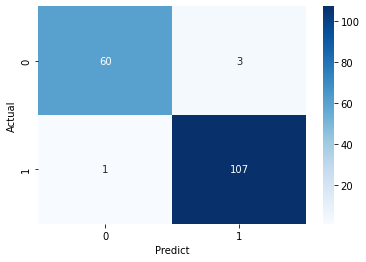

In [25]:
# 테스트 데이터 confusion matrix 변수에 저장
cm = confusion_matrix(y_test, lr_preds)

# 히트맵으로 confusion matrix 결과값 출력(숫자 표기)
sns.heatmap(cm, annot= True, cmap='Blues', fmt='d')

plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

### 정밀도(Precision)
- positive 예측 정확도
- 예측값이 positive한 대상 중 예측값과 실제값이 positive로 일치한 데이터의 비율

In [26]:
from sklearn.metrics import precision_score

In [27]:
# 정밀도(Precision) 출력
print(f'정밀도(precision): {precision_score(y_test, lr_preds):.4f}')

정밀도(precision): 0.9727


### 재현율(Recall)
- 실제값이 positive한 대상 중 예측값과 실제값이 positive로 일치한 데이터의 비율
- 민감도(Sensitivity) 혹은 True Positive Rate(TPR)도 같은 말

In [28]:
from sklearn.metrics import recall_score

In [29]:
# 재현율(recall) 출력
print(f'재현율(recall): {recall_score(y_test, lr_preds):.4f}')

재현율(recall): 0.9907


### F1 Score
- 정밀도와 재현율의 조화평균을 나타내는 지표
- $2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$

In [30]:
from sklearn.metrics import f1_score

In [31]:
# F1 Score 출력
print(f'F1 Score: {f1_score(y_test, lr_preds):.4f}')

F1 Score: 0.9817


### 결과 분석

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
# 오차 행렬(confusion matrix) 출력
confusion_matrix(y_test, lr_preds)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [34]:
acccuracy = accuracy_score(y_test, lr_preds) # 정확도(accuracy)
precision = precision_score(y_test, lr_preds) # 정밀도(precision)
recall = recall_score(y_test, lr_preds) # 재현율(recall)
f1 = f1_score(y_test, lr_preds) # F1 score

print(f'정확도: {acccuracy:.3f}, 정밀도: {precision:.3f}, 재현율: {recall:.3f},  F1: {f1:.3f}')

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


### 임계값에 따른 성능비교(ROC)

In [35]:
# predict_proba() -> 각 클래스(target)가 0, 1을 반환할 확률 추출
pred_prob_test = lr_clf.predict_proba(x_test)

In [36]:
# pred_prob_test 상위 5개 데이터 출력(전체 171행 = target 데이터 행의 개수)
pred_prob_test[:5] # pred_prob_test.head()

# 두 개의 열로 이루어진 numpy 배열
# 첫 번째 열은 정답(target) 데이터 값이 0이 될 확률, 두 번째 열은 1이 될 확률(각 행의 확률값을 합하면 1)
# 실제로 알고리즘도 확률값을 보고 예측 수행: 대부분 기준은 0.5(보다 크면 0, 아니면 1)

array([[0.99864569, 0.00135431],
       [0.03842822, 0.96157178],
       [0.00130563, 0.99869437],
       [0.0103849 , 0.9896151 ],
       [0.000246  , 0.999754  ]])

In [37]:
threshold = 0.5 # 기준(임계값) 0.5

# 두 번째 열의 값(target 값이 1이 될 확률)이 임계값(0.5)보다 크면 1, 작으면 0을 반환하는 변수 생성
pred_test = pred_prob_test[:, 1] > 0.5 # boolean 값 반환(확률이 0.5보다 크면 True, 작으면 False)
pred_test = pred_test.astype('int') # True면 1, False면 0을 반환하도록 정수형으로 변환

# 정오 행렬 출력
confusion_matrix(y_test, pred_test)

# 앞서 출력한 confusion matrix와 같은 값을 반환
# 알고리즘도 내부적으로는 확률값을 보고 1인지 0인지 판단

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [38]:
pred_test

# pred_prob_test 각 행의 반환값(0 또는 1)을 array 형태로 출력

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [39]:
# cut_off에 따른 예측값 재산출(함수 생성)


# 1) 확률값(1이 나올 확률)이 threshold보다 크면 1, 작거나 같으면 0을 반환하는 함수

def cut_off(prob_class1,threshold):
    
    y_prob = prob_class1.copy() # prob_class1의 복사본 y_prob 생성

    y_prob[y_prob > threshold] = 1
    y_prob[y_prob <= threshold] = 0
    
    return(y_prob.astype(int)) # float 형태의 y_prob을 integer 형태로 변환


# 2) 정확도, 정밀도, 재현율, F1 Score 산출 함수

def score_list(y_test, y_test_pred_tmp):
    
    accuracy = accuracy_score(y_test, y_test_pred_tmp)
    precision = precision_score(y_test, y_test_pred_tmp)
    recall = recall_score(y_test,  y_test_pred_tmp)
    f1 = f1_score(y_test, y_test_pred_tmp)
    
    return ([accuracy, precision, recall, f1])

In [40]:
# 클래스(정답 데이터)가 1이 나올 확률값을 pred_prob_class1에 저장
pred_prob_class1 = pred_prob_test[:, 1]
# 첫 번째 열이 0이 나올 확률값, 두 번째 열이 1이 나올 확률값 -> 두 번째 열만 추출

y_test_pred_tmp = cut_off(pred_prob_class1, 0.5) # 임계값: 0.5

# 오차 행렬(= 정오 행렬) 생성
confusion_matrix(y_test, y_test_pred_tmp)

# lr_preds를 넣었을 때와 동일한 결과 반환(lr_preds = lr_clf.predict(x_test))

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [41]:
y_test_pred_tmp

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [42]:
# 임계값에 따른 score_list를 담을 빈 데이터프레임 table 생성
# 컬럼명: 'accuracy', 'precision', 'recall', 'F1'
table = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'F1'])
table

,accuracy,precision,recall,F1


In [43]:
thresholds = np.arange(0.1, 1.0, 0.1) # 0.1부터 0.9까지 0.1씩 증가하는 숫자들의 array [0.1, 0.2, ... , 0.9] 생성

# 임계값을 0.1부터 0.9까지 차례로 적용하면서 각각의 score_list를 table에 저장
for i in thresholds:
    y_test_pred_tmp = cut_off(pred_prob_class1, i) # cut_off() 함수 호출
    table.loc[i] = score_list(y_test, y_test_pred_tmp) # score_list() 함수 호출

In [44]:
table.index.name = 'threshold' # 인덱스 이름 설정
table

# 임계값의 변화에 따른 성능 지표의 변화 추이 확인
# 일반적으로 임계값 0.5 사용

,accuracy,precision,recall,F1
threshold,,,,
0.1,0.953216,0.931034,1.000000,0.964286
0.2,0.964912,0.947368,1.000000,0.972973
0.3,0.964912,0.947368,1.000000,0.972973
0.4,0.970760,0.963964,0.990741,0.977169
0.5,0.976608,0.972727,0.990741,0.981651
0.6,0.947368,0.980583,0.935185,0.957346
0.7,0.941520,0.980392,0.925926,0.952381
0.8,0.935673,0.989899,0.907407,0.946860
0.9,0.894737,0.989130,0.842593,0.910000


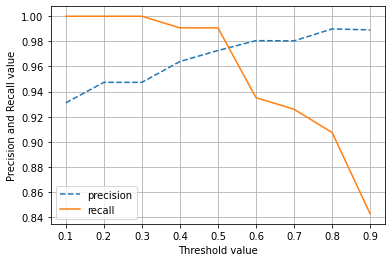

In [45]:
# precision, recall 값을 하나의 좌표에 시각화하여 비교

plt.figure(figsize=(6, 4))

# x값은 table.index, y값은 precision
plt.plot(table.index, table['precision'], linestyle='--', label='precision') # seaborn과 달리 label 설정 파라미터 존재

# x값은 table.index, y값은 recall
plt.plot(table.index, table['recall'], label='recall') # default linestyle

plt.xticks(table.index)

# x축과 y축 label, legend, grid 설정
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()

# 정밀도와 재현율은 trade-off 관계

### ROC Curve

In [46]:
len(lr_clf.predict_proba(x_test)[:, 1])

171

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# 정답 데이터가 1일 때의 예측 확률을 pred_proba_class1 변수에 저장 
pred_proba_class1 = pred_prob_test[:, 1] # lr_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# roc_curve()의 returns:
# FPR, TPR 목록(오름차순)
# FPR, TPR 계산에 사용된 임계값 목록(내림차순)

fprs, tprs, thresholds

(array([0.        , 0.        , 0.        , 0.01587302, 0.01587302,
        0.03174603, 0.03174603, 0.06349206, 0.06349206, 1.        ]),
 array([0.        , 0.00925926, 0.75925926, 0.75925926, 0.92592593,
        0.92592593, 0.99074074, 0.99074074, 1.        , 1.        ]),
 array([1.99999999, 0.99999999, 0.97340749, 0.9721597 , 0.7854696 ,
        0.72289402, 0.52175159, 0.45184925, 0.36234078, 0.        ]))

Text(0, 0.5, 'TRP(Recall)')

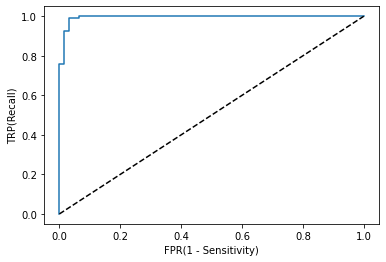

In [48]:
# ROC 곡선 출력

plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TRP(Recall)')

In [49]:
# AUC(Area Under Curve): ROC 곡선 밑의 면적
roc_score = roc_auc_score(y_test, pred_proba_class1) # pred_proba_class1 = pred_prob_test[:, 1]
print(f'AUC: {roc_score:.4f}')

AUC: 0.9947
